<a href="https://colab.research.google.com/github/astefano/CF_XAI/blob/main/boilerplate_medical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving medical_examination.csv to medical_examination.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['medical_examination.csv']))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
n = df.size
print(n)

910000


In [5]:
df['BMI']=df['weight']/(df['height']/100)**2

In [6]:
df['overweight']= df['BMI']>25
df['overweight']= df['overweight'].astype(int)

In [7]:
df['cholesterol'] = np.where(df['cholesterol'] > 1, 1, 0)
df['gluc'] = np.where(df['gluc'] > 1, 1, 0)

In [ ]:
print(df)

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            0     0   
1          1  20228    1     156    85.0    140     90            0     0   
2          2  18857    1     165    64.0    130     70            0     0   
3          3  17623    2     169    82.0    150    100            0     0   
4          4  17474    1     156    56.0    100     60            0     0   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            0     0   
69996  99995  22601    1     158   126.0    140     90            0     1   
69997  99996  19066    2     183   105.0    180     90            0     0   
69998  99998  22431    1     163    72.0    135     80            0     1   
69999  99999  20540    1     170    72.0    120     80            0     0   

       smoke  alco  active  cardio        BMI  overweight  
0          0   

In [8]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])#,var_name="med_categories")

In [9]:
print(df_cat)

        cardio     variable  value
0            0  cholesterol      0
1            1  cholesterol      1
2            1  cholesterol      1
3            1  cholesterol      0
4            0  cholesterol      0
...        ...          ...    ...
419995       0   overweight      1
419996       1   overweight      1
419997       1   overweight      1
419998       1   overweight      1
419999       0   overweight      0

[420000 rows x 3 columns]


In [10]:
df_cat1 = df_cat.pivot_table(index=['cardio'], columns='variable', aggfunc='count').fillna(0)
print(df_cat1)

          value                                            
variable active   alco cholesterol   gluc overweight  smoke
cardio                                                     
0         35021  35021       35021  35021      35021  35021
1         34979  34979       34979  34979      34979  34979


In [ ]:
df_cat2 = df_cat.pivot_table(index=['cardio'], columns='variable', aggfunc='size').fillna(0)
print(df_cat2)

variable  active   alco  cholesterol   gluc  overweight  smoke
cardio                                                        
0          35021  35021        35021  35021       35021  35021
1          34979  34979        34979  34979       34979  34979


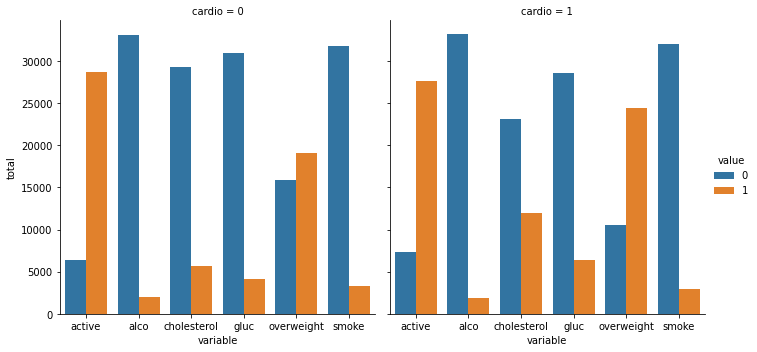

In [18]:
cat_order = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
cat_order.sort()
fig = sns.catplot(data=df_cat, x = "variable", col='cardio', order=cat_order, kind='count',hue='value')
fig.set_ylabels("total")
fig.savefig("catplot.png")

In [41]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
df_heat.drop(['BMI'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
print(df_heat)

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            0     0   
1          1  20228    1     156    85.0    140     90            1     0   
2          2  18857    1     165    64.0    130     70            1     0   
3          3  17623    2     169    82.0    150    100            0     0   
4          4  17474    1     156    56.0    100     60            0     0   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69993  99991  19699    1     172    70.0    130     90            0     0   
69994  99992  21074    1     165    80.0    150     80            0     0   
69995  99993  19240    2     168    76.0    120     80            0     0   
69998  99998  22431    1     163    72.0    135     80            0     1   
69999  99999  20540    1     170    72.0    120     80            1     0   

       smoke  alco  active  cardio  overweight  
0          0     0       1

In [43]:
corr = df_heat.corr()

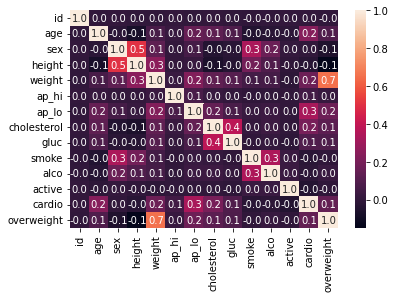

In [45]:
sns.heatmap(corr, annot=True, fmt='.1f')
plt.show()

In [49]:
mask = np.triu(np.ones_like(corr, dtype=bool))

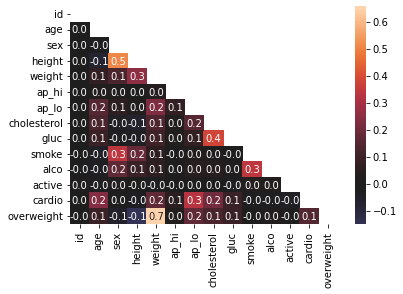

In [52]:
shm = sns.heatmap(corr, mask=mask, center=0, annot=True, fmt='.1f')
fig = shm.get_figure()
fig.savefig('heatmap.png')